<a href="https://colab.research.google.com/github/aman-pandey24/EDA_Project/blob/master/IPL_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL DATASET ANALYSIS (2008-2017)

![Screenshot%202022-09-12%20153235.png](attachment:Screenshot%202022-09-12%20153235.png)

- Indian Premier League popularly known as IPL is a cricket tournament which is hosted by The Board of Control for Cricket in India(BCCI). Players from different nations take part in this tournament and make it exciting for cricket lovers.IPL gives opportunities to the young players to showcase their talent and improve their experience by playing with some of the best and most experienced players of cricket.Since the dawn of the IPL in 2008, it has attracted viewers all around the globe.Every year the IPL game is played and celebrated as a month-long cricket festival for Indians and cricket lovers throughout the world.High level of uncertainity and last moment nail biters has urged the fans to watch the matches.Withing short period of time IPL becomes the highest revenue generating league of cricket. Data Analytics has been a part of sports entertainment for a long time.During cricket match we all see prediction of who will win the match on the basis of current performance of team, player and toss decision. This is why data Analytics come in action.

# About The Dataset

- The name of the Dataset used for this project are matches.csv and deliveries.csv .There are 636 rows and 17 columns in matches.csv file which contains the summary of all matches played between 2008 to 2017 while the dataset deliveries.csv is quite large with 150460 rows and 21 column which reprsents data of each deliveries.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# DATA CLEANING

### Reading Data from csv file

In [ ]:
df=pd.read_csv("C:/Users/Dell/Downloads/matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


##### Getting the information about the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

- Out of 17 column 1 column is of float64 datatype, 5 are of int64 datatype and 12 are of object datatype
- range index is from 0 to 635
- column "city","winner","player_of_match","umpire1","umpire2" and "umpire3" have null values

In [ ]:
## since umpire3 contains all the values as null so its better to drop it
df.drop("umpire3",axis=1,inplace=True)

In [ ]:
# since id is of no use for our visualization we simply remove it
df.drop("id",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

- column "city" have 7 null values,"winner" have 3 null values,"player_of_match" have 3 null values ,"umpire1" has 1 null value and "umpire2" has 1 null value.

In [ ]:
## since the data is important and removing of nan values cause loss of data so instead of dropping we replace the nan with-
## suitable values
df['city']=df['city'].fillna("Data not collected")
df['winner']=df['winner'].fillna("match tied")
df['player_of_match']=df['player_of_match'].fillna("player of match not decided")
df['umpire1']=df['umpire1'].fillna('no record of name')
df['umpire2']=df['umpire2'].fillna('np record of name')
df.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
df["team2"].value_counts()

Delhi Daredevils               84
Royal Challengers Bangalore    82
Kolkata Knight Riders          80
Mumbai Indians                 75
Kings XI Punjab                71
Rajasthan Royals               64
Chennai Super Kings            54
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

- We observe from above that same team appears twice with different names i.e. "Rising Pune Supergiants" and "Rising Pune Supergiant", therefore we need to fix this error

In [ ]:
# as i found two names of same team in team1,team2,winner,and toss_winner column so we need to replace it
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df["team2"]=df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"]=df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"]=df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

# Reading second dataset

In [ ]:
df1=pd.read_csv("C:/Users/Dell/Downloads/deliveries.csv")
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df1["batting_team"]=df1["batting_team"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df1["bowling_team"]=df1["bowling_team"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

- Out of 21 column 13 are of int64 datatype and 8 are of object datatype
- Range index is from 0 to 150459
- column "player_dismissed","dismissal_kind" and "fielder" have null values

In [ ]:
## there is very few non null values in the column player_dismissed,dismissal_kind,fielder so simply drop it
df1.drop(["player_dismissed","dismissal_kind","fielder"],axis=1,inplace=True)

In [ ]:
df1.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

- none of the column have null values

# Univariate Analysis

### What is count of ipl matches played every season ?

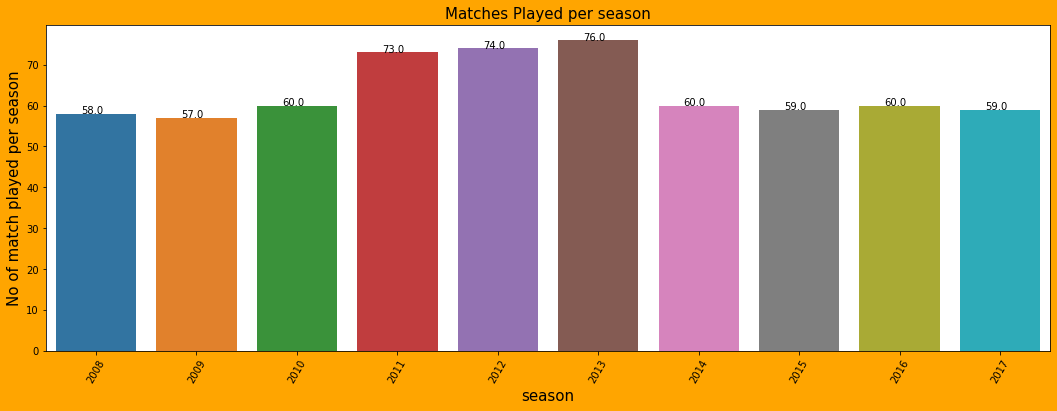

In [ ]:
plt.figure(figsize=[18,6],facecolor="orange")
ax=sns.countplot('season',data=df)
plt.title('Matches Played per season',fontsize=15)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of match played per season",fontsize=15)
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Observations
- maximum number of matches played in season 2013
- least number of matches played in season 2009

### Which city host maximum matches of IPL ?

<AxesSubplot:>

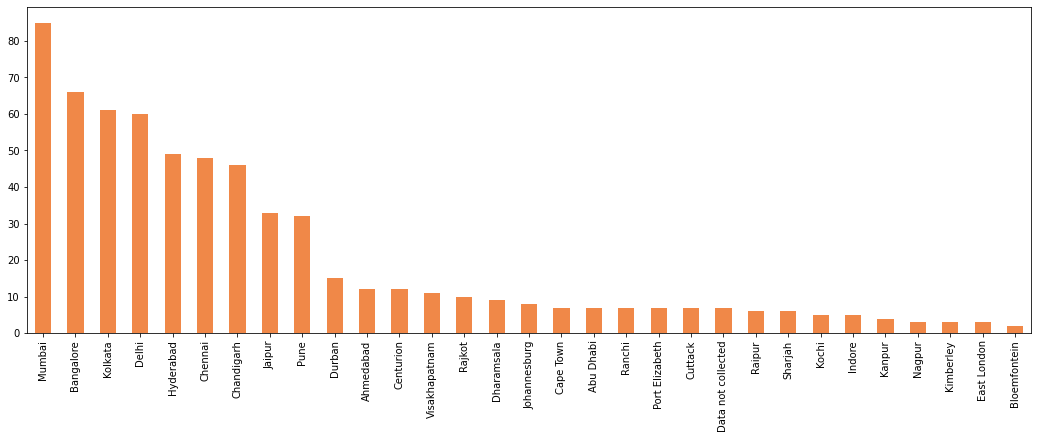

In [ ]:
df["city"].value_counts().plot.bar(figsize=[18,6],color='#F08848')

#### Answer
- maximum number of ipl matches played in mumbai city
- from above we see that most of the matches were played in metropolitan city and this may be the reason that mumbai is most populated in india and due to high popularity of cricket and having good capacity of stadium, most of matches were played there in order to earn more revenue.

### Which team won maximum number of toss in the ipl ?

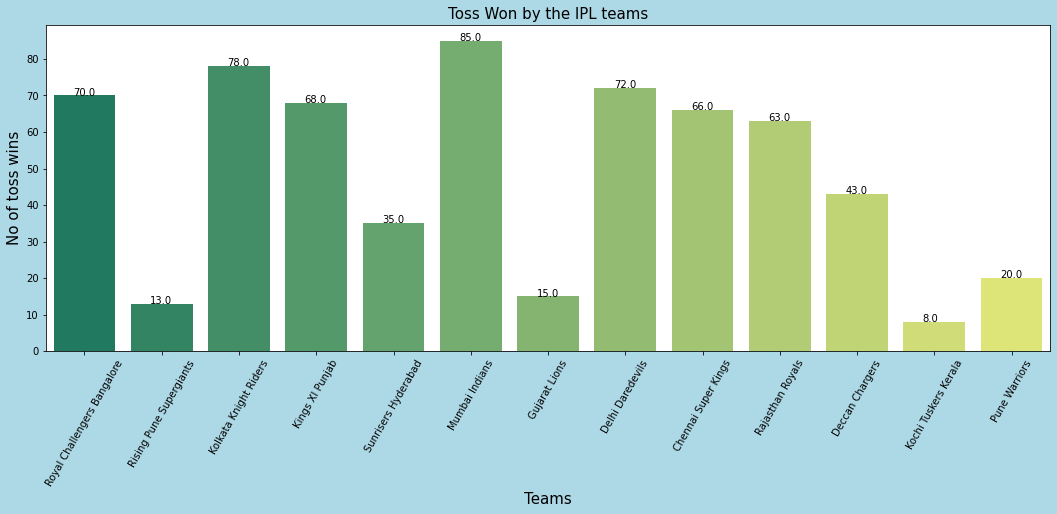

In [ ]:
plt.figure(figsize=[18,6],facecolor="lightblue")
ax=sns.countplot('toss_winner',data=df,palette="summer")
plt.title('Toss Won by the IPL teams',fontsize=15)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of toss wins",fontsize=15)
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Answer 
- maximum number of toss is win by Mumbai Indians
- since the probability of wining and losing toss is 50% , so it may be possible that mumbai have luckiest captain or team have better luck during the toss that's why they won maximum number of toss over the season

### What is the decision of teams after winning the toss ?

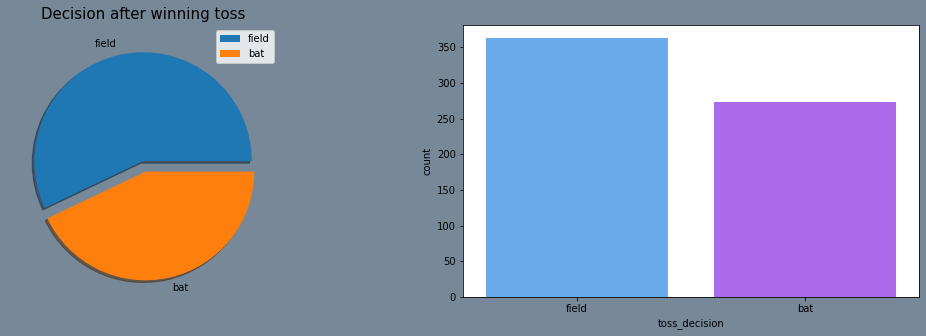

In [ ]:
f,ax=plt.subplots(1,2,figsize=[18,5],facecolor="lightslategray")
df["toss_decision"].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True,fontsize=10)
ax[0].set_title("Decision after winning toss",fontsize=15)
ax[0].set_ylabel("")
sns.countplot('toss_decision',data=df,palette="cool",ax=ax[1])
ax[0].legend()
plt.show()

### Answer
- majority of teams choose field first after winning the toss
- since most of the team want to know the pitch condition therefore they invite other team to bat first
- also t

### Analyse the number of matches affected by bad wheather condition

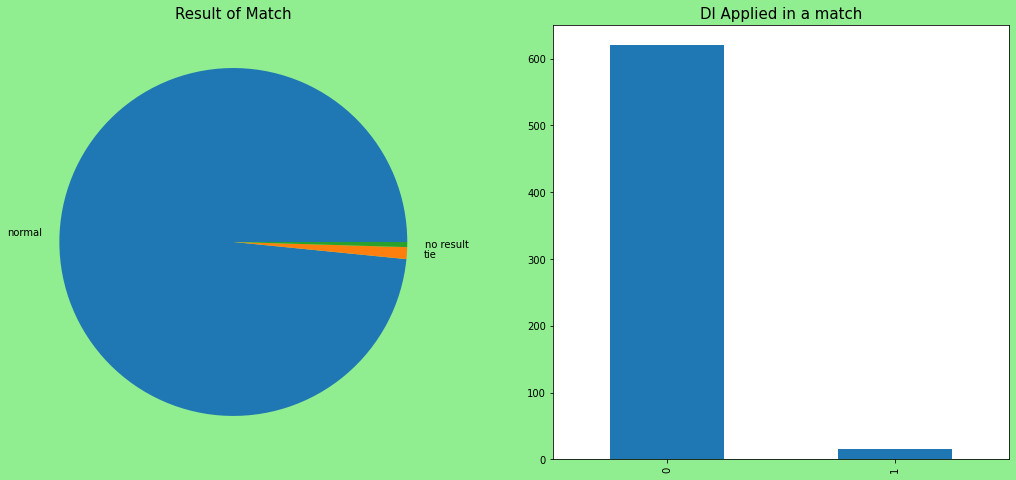

In [ ]:
f,ax=plt.subplots(1,2,figsize=[18,8],facecolor="lightgreen")
df['result'].value_counts().plot.pie(ax=ax[0],fontsize=10)
ax[0].set_ylabel("")
ax[1]=df['dl_applied'].value_counts().plot.bar()
ax[1].set_title("Dl Applied in a match",fontsize=15)
ax[0].set_title("Result of Match",fontsize=15)
plt.show()

- very few of the match result is tie or no result other than that all match result is normal
- in very few matches DL applied indicates that in very few matches climate is not good

### Which team won maximum matches of ipl?

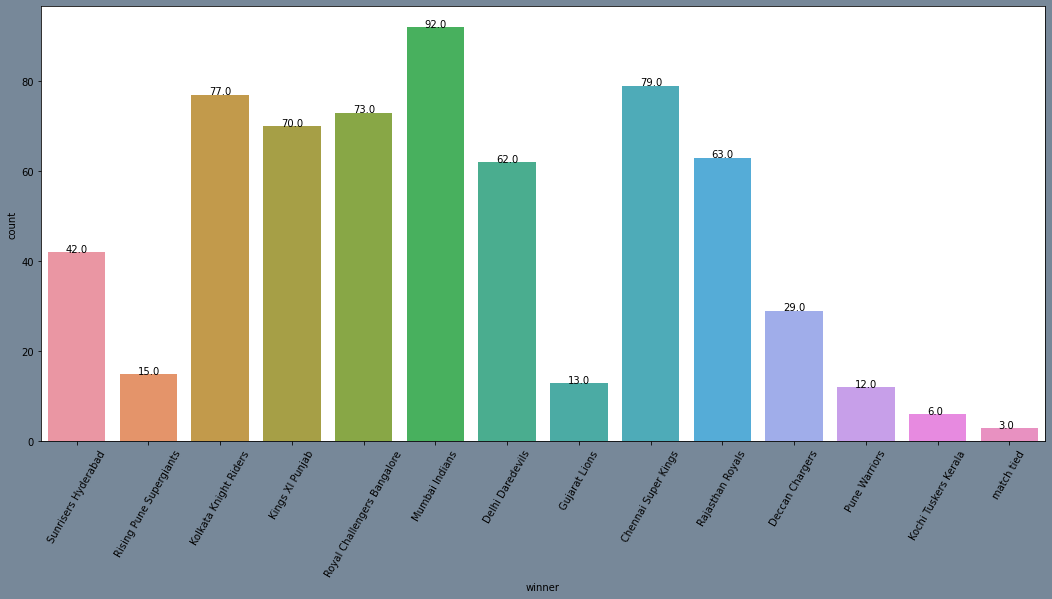

In [ ]:
plt.figure(figsize=[18,8],facecolor="lightslategray")
ax=sns.countplot('winner',data=df)
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#### Answer
- mumbai inidans is the most successfull franchise as maximum matches were won by them. 

### Which player won maximum number of player of the match award ?

In [ ]:
df['player_of_match'].value_counts().head(5)

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
Name: player_of_match, dtype: int64

#### Answer
- Ch Gayle is the player who win maximum number of player of the match award

In [ ]:
df1['is_super_over'].sum()

81

In [ ]:
df1['extra_runs'].sum()

10385

In [ ]:
df1['total_runs'].sum()

194314

### Outcome
- 81 super over have happened so far in ipl.
- 10385 extra runs were given by the bowlers.
- 194314 total runs made in ipl till 2017.

# Bivariate Analysis

In [ ]:
pd.crosstab(df.toss_winner,df.winner,margins=True).style.background_gradient(cmap='summer_r')

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,match tied,All
toss_winner,,,,,,,,,,,,,,,
Chennai Super Kings,42,1,3,0,4,0,4,4,1,2,0,4,1,0,66
Deccan Chargers,2,19,5,0,3,0,3,4,1,3,0,3,0,0,43
Delhi Daredevils,4,0,33,1,6,0,4,9,1,6,0,5,2,1,72
Gujarat Lions,0,0,0,10,2,0,0,1,0,0,0,2,0,0,15
Kings XI Punjab,3,2,3,0,28,0,6,5,2,6,1,6,6,0,68
Kochi Tuskers Kerala,0,1,0,0,0,4,0,0,1,0,0,2,0,0,8
Kolkata Knight Riders,6,1,4,0,6,2,44,5,1,4,0,1,4,0,78
Mumbai Indians,5,0,6,0,9,0,2,48,1,2,3,5,4,0,85
Pune Warriors,3,0,2,0,1,0,0,3,3,2,0,4,2,0,20


### Outcome
- from the above plot we can conclude that in maximum cases the team whoever won the toss won the match

In [ ]:
pd.crosstab(df.toss_decision,df.winner,margins=True).style.background_gradient('plasma')

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,match tied,All
toss_decision,,,,,,,,,,,,,,,
bat,50,14,28,2,20,0,34,41,9,30,2,26,16,1,273
field,29,15,34,11,50,6,43,51,3,33,13,47,26,2,363
All,79,29,62,13,70,6,77,92,12,63,15,73,42,3,636


### Outcome
- majority of teams who decided to field first had won the match

In [ ]:
df['win_by_runs']=df['win_by_runs'].apply(lambda x:1 if x>0 else 0)

In [ ]:
df['win_by_wickets']=df['win_by_wickets'].apply(lambda x:1 if x>0 else 0)

In [ ]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


# Ananlysis of Final Match of all seasons

In [ ]:
final_matches=df.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


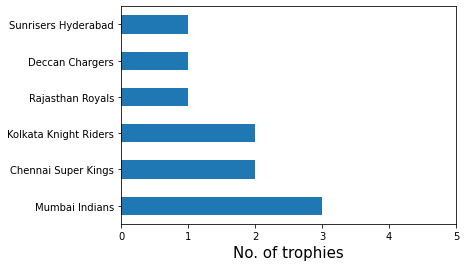

In [ ]:
final_matches['winner'].value_counts().plot.barh()
plt.xlim([0,5])
plt.xlabel("No. of trophies",fontsize=15)
plt.show()

- Mumbai Indians has the most IPL titles

In [ ]:
final_matches[['winner','toss_winner','toss_decision']].reset_index(drop=True)

,winner,toss_winner,toss_decision
0,Mumbai Indians,Mumbai Indians,bat
1,Rajasthan Royals,Rajasthan Royals,field
2,Deccan Chargers,Royal Challengers Bangalore,field
3,Chennai Super Kings,Chennai Super Kings,bat
4,Chennai Super Kings,Chennai Super Kings,bat
5,Kolkata Knight Riders,Chennai Super Kings,bat
6,Mumbai Indians,Mumbai Indians,bat
7,Kolkata Knight Riders,Kolkata Knight Riders,field
8,Mumbai Indians,Chennai Super Kings,field
9,Sunrisers Hyderabad,Sunrisers Hyderabad,bat


<span style="color:red">From above we can conclude that in final matches the majority of toss_winner who chooses bat first win the trophy </span> 

In [ ]:
four_data=df1[df1["batsman_runs"]==4]
six_data=df1[df1["batsman_runs"]==6]

In [ ]:
four_data.groupby("batting_team")["batsman_runs"].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,7080,1770
Deccan Chargers,3828,957
Delhi Daredevils,7880,1970
Gujarat Lions,1840,460
Kings XI Punjab,8332,2083
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,7912,1978
Mumbai Indians,8580,2145
Pune Warriors,2100,525


In [ ]:
six_data.groupby("batting_team")["batsman_runs"].agg([('runs by six','sum'),('six','count')])

,runs by six,six
batting_team,,
Chennai Super Kings,4452,742
Deccan Chargers,2400,400
Delhi Daredevils,4116,686
Gujarat Lions,930,155
Kings XI Punjab,4572,762
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,3954,659
Mumbai Indians,5256,876
Pune Warriors,1176,196


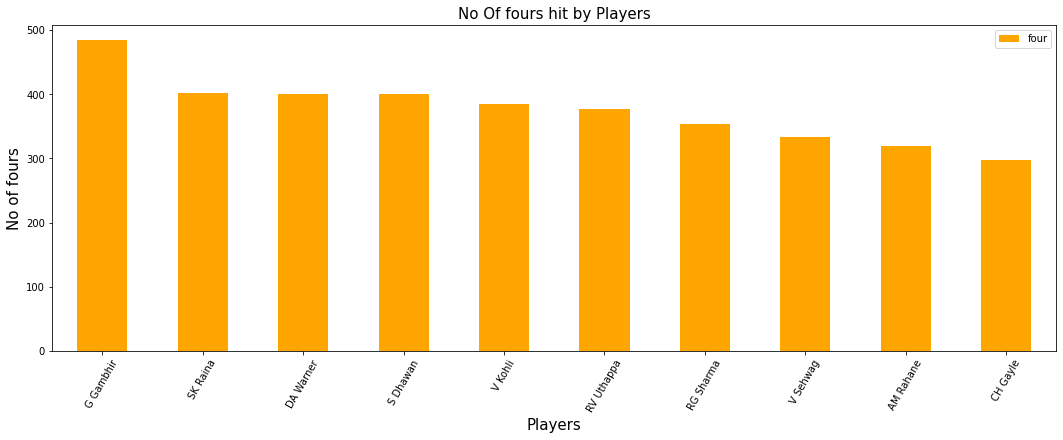

In [ ]:

players_four=four_data.groupby("batsman")["batsman_runs"].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=players_four[:10].plot.bar("batsman","four",color='orange',figsize=[18,6])
plt.xticks(rotation=60)
plt.title("No Of fours hit by Players",fontsize=15)
plt.xlabel("Players",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

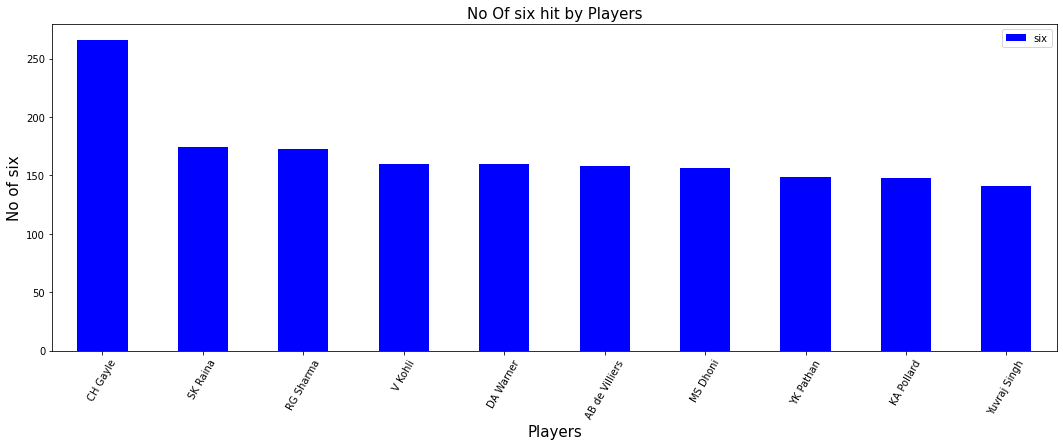

In [ ]:
players_four=six_data.groupby("batsman")["batsman_runs"].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=players_four[:10].plot.bar("batsman","six",color='blue',figsize=[18,6])
plt.xticks(rotation=60)
plt.title("No Of six hit by Players",fontsize=15)
plt.xlabel("Players",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

# Analysis of first 6 overs and last 5 overs

### Which are the teams with highest runs in first 6 overs of powerlplay and highest runs in last 5 overs ?

In [ ]:
df1['inning'].value_counts()

1    78029
2    72350
3       43
4       38
Name: inning, dtype: int64

In [ ]:
Team_runs_overwise=df1.groupby(['batting_team','over','inning'])["total_runs"].sum().reset_index()
Team_runs_overwise

,batting_team,over,inning,total_runs
0,Chennai Super Kings,1,1,404
1,Chennai Super Kings,1,2,271
2,Chennai Super Kings,1,3,9
3,Chennai Super Kings,2,1,524
4,Chennai Super Kings,2,2,420
...,...,...,...,...
526,Sunrisers Hyderabad,18,2,239
527,Sunrisers Hyderabad,19,1,522
528,Sunrisers Hyderabad,19,2,213
529,Sunrisers Hyderabad,20,1,498


In [ ]:
Team_runs_overwise=Team_runs_overwise[Team_runs_overwise['inning']==1]
Team_runs_overwise.drop('inning',axis=1,inplace=True)

In [ ]:
Team_runs_overwise

,batting_team,over,total_runs
0,Chennai Super Kings,1,404
3,Chennai Super Kings,2,524
5,Chennai Super Kings,3,609
7,Chennai Super Kings,4,552
9,Chennai Super Kings,5,699
...,...,...,...
521,Sunrisers Hyderabad,16,402
523,Sunrisers Hyderabad,17,398
525,Sunrisers Hyderabad,18,442
527,Sunrisers Hyderabad,19,522


In [ ]:
##Runs made by teams in all overs from the first to last season 
Team_runs_overwise_pivot=pd.pivot_table(data=Team_runs_overwise,index="batting_team",columns="over",values="total_runs")
Team_runs_overwise_pivot

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batting_team,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,404,524,609,552,699,683,515,551,566,533,603,671,604,655,683,674,783,763,801,820
Deccan Chargers,267,347,299,299,312,317,266,307,300,284,336,358,311,332,371,393,431,456,398,381
Delhi Daredevils,358,437,515,552,510,449,402,395,439,413,512,451,463,463,434,484,536,593,607,612
Gujarat Lions,97,107,112,96,127,114,109,105,116,124,108,90,119,111,104,100,132,126,146,124
Kings XI Punjab,446,552,584,592,638,652,479,615,584,600,578,567,614,628,669,687,646,643,716,798
Kochi Tuskers Kerala,53,42,61,48,46,71,50,46,40,43,44,53,52,41,58,31,51,56,54,69
Kolkata Knight Riders,447,517,491,515,512,516,428,406,447,492,523,489,547,473,577,567,631,665,638,661
Mumbai Indians,402,569,590,621,635,734,517,529,597,542,585,661,649,692,738,781,797,850,906,992
Pune Warriors,125,112,165,130,141,146,102,145,149,153,159,147,124,127,140,165,149,189,208,197


In [ ]:
Runs_by_team_in_last_5_overs=Team_runs_overwise_pivot[16]+Team_runs_overwise_pivot[17]+Team_runs_overwise_pivot[18]+Team_runs_overwise_pivot[19]+Team_runs_overwise_pivot[20]
Runs_by_team_in_last_5_overs

batting_team
Chennai Super Kings            3841
Deccan Chargers                2059
Delhi Daredevils               2832
Gujarat Lions                   628
Kings XI Punjab                3490
Kochi Tuskers Kerala            261
Kolkata Knight Riders          3162
Mumbai Indians                 4326
Pune Warriors                   908
Rajasthan Royals               2325
Rising Pune Supergiants         695
Royal Challengers Bangalore    3686
Sunrisers Hyderabad            2262
dtype: int64

In [ ]:
res=pd.DataFrame(data=Runs_by_team_in_last_5_overs).sort_values(0,ascending=False).reset_index()
res.head()

,batting_team,0
0,Mumbai Indians,4326
1,Chennai Super Kings,3841
2,Royal Challengers Bangalore,3686
3,Kings XI Punjab,3490
4,Kolkata Knight Riders,3162


In [ ]:
Runs_by_team_in_first_6_overs=Team_runs_overwise_pivot[1]+Team_runs_overwise_pivot[2]+Team_runs_overwise_pivot[3]+Team_runs_overwise_pivot[4]+Team_runs_overwise_pivot[5]+Team_runs_overwise_pivot[6]
Runs_by_team_in_first_6_overs

batting_team
Chennai Super Kings            3471
Deccan Chargers                1841
Delhi Daredevils               2821
Gujarat Lions                   653
Kings XI Punjab                3464
Kochi Tuskers Kerala            321
Kolkata Knight Riders          2998
Mumbai Indians                 3551
Pune Warriors                   819
Rajasthan Royals               2445
Rising Pune Supergiants         706
Royal Challengers Bangalore    2966
Sunrisers Hyderabad            2068
dtype: int64

In [ ]:
res=pd.DataFrame(data=Runs_by_team_in_first_6_overs).sort_values(0,ascending=False).reset_index()
res.head()

,batting_team,0
0,Mumbai Indians,3551
1,Chennai Super Kings,3471
2,Kings XI Punjab,3464
3,Kolkata Knight Riders,2998
4,Royal Challengers Bangalore,2966


### Answer
- Mumbai Indians is the team that scores maximum runs in last five overs and first 6 overs based on first inning 
- we cant predict the above conclusion on basis of 2nd inning as it may be possible that the teams wins or loose the match without playing 16-20 overs match

### Who is most destructive batsman in last five overs ?

In [ ]:
Batsman_runs_overwise=df1.groupby(['batsman','over'])["batsman_runs"].sum().reset_index()
Batsman_runs_overwise

,batsman,over,batsman_runs
0,A Ashish Reddy,5,0
1,A Ashish Reddy,6,5
2,A Ashish Reddy,12,1
3,A Ashish Reddy,13,9
4,A Ashish Reddy,14,22
...,...,...,...
5157,Z Khan,16,7
5158,Z Khan,17,5
5159,Z Khan,18,15
5160,Z Khan,19,41


In [ ]:
Batsman_runs_overwise_pivot=pd.pivot_table(data=Batsman_runs_overwise,index="batsman",columns="over",values="batsman_runs")
Batsman_runs_overwise_pivot.fillna(0,inplace=True)
Batsman_runs_overwise_pivot

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batsman,,,,,,,,,,,,,,,,,,,,
A Ashish Reddy,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,22.0,29.0,22.0,32.0,42.0,61.0,57.0
A Chandila,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
A Chopra,2.0,7.0,3.0,1.0,5.0,9.0,2.0,4.0,4.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,10.0,8.0
A Flintoff,0.0,0.0,0.0,1.0,13.0,0.0,1.0,1.0,7.0,1.0,1.0,3.0,3.0,0.0,6.0,3.0,6.0,6.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,8.0,10.0,12.0,40.0,31.0,20.0,8.0,11.0,12.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,25.0
Yashpal Singh,0.0,1.0,4.0,2.0,1.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,1.0,2.0,3.0,6.0,2.0,5.0,4.0,0.0
Younis Khan,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Runs_by_batsman_in_last_5_overs=Batsman_runs_overwise_pivot[16]+Batsman_runs_overwise_pivot[17]+Batsman_runs_overwise_pivot[18]+Batsman_runs_overwise_pivot[19]+Batsman_runs_overwise_pivot[20]
Runs_by_batsman_in_last_5_overs.sort_values(ascending=False).head().astype(int)

batsman
MS Dhoni          2076
KA Pollard        1352
RG Sharma         1314
AB de Villiers    1203
V Kohli            993
dtype: int32

#### Answer
- MS DHONI is the most destructive batsman in last five overs as he scored maximum runs last 5 overs.

### Who is most succeful batsman of IPL ?

In [ ]:
Batsman_runs_in_all_season=df1.groupby('batsman')['batsman_runs'].sum()
Batsman_runs_in_all_season.sort_values(ascending=False).head()

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

#### Answer
- Raina is the most successful batsman in the ipl 

# Rivalry between Mumbai Indians and Chennai Super Kings

### Who won the rivalry?

In [ ]:
Rivalry=df[((df["team1"]=="Mumbai Indians")&(df["team2"]=="Chennai Super Kings"))|((df["team2"]=="Mumbai Indians")&(df["team1"]=="Chennai Super Kings"))]
Rivalry

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
66,2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,1,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
95,2008,Mumbai,14-05-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,1,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
117,2009,Cape Town,18-04-2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,1,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan
161,2009,Port Elizabeth,16-05-2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,1,ML Hayden,St George's Park,SK Tarapore,SJA Taufel
193,2010,Mumbai,25-03-2010,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,1,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba
210,2010,Chennai,06-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,1,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper
233,2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,1,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
256,2011,Mumbai,22-04-2011,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,1,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba
307,2012,Chennai,04-04-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,1,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel
354,2012,Mumbai,06-05-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,1,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani


In [ ]:
Rivalry.shape

(22, 16)

In [ ]:
Rivalry["winner"].value_counts()

Mumbai Indians         12
Chennai Super Kings    10
Name: winner, dtype: int64

### Answer
- Mumbai Indians and Chennai Super Kings played 22 matches with each other out of which mumbai dominated the csk and won 12 matches whereas chennai won 10 matches .

## Who scored maximum runs in the rivalry match between mumbai and csk?

In [ ]:
Rivalry2=df1[((df1["batting_team"]=="Mumbai Indians")&(df1["bowling_team"]=="Chennai Super Kings"))|((df1["bowling_team"]=="Mumbai Indians")&(df1["batting_team"]=="Chennai Super Kings"))]
Rivalry2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
15486,67,1,Chennai Super Kings,Mumbai Indians,1,1,PA Patel,ML Hayden,SM Pollock,0,1,0,0,0,0,0,1,1
15487,67,1,Chennai Super Kings,Mumbai Indians,1,2,PA Patel,ML Hayden,SM Pollock,0,0,0,0,0,0,0,0,0
15488,67,1,Chennai Super Kings,Mumbai Indians,1,3,PA Patel,ML Hayden,SM Pollock,0,0,0,0,0,0,0,0,0
15489,67,1,Chennai Super Kings,Mumbai Indians,1,4,PA Patel,ML Hayden,SM Pollock,0,0,0,0,0,0,0,0,0
15490,67,1,Chennai Super Kings,Mumbai Indians,1,5,PA Patel,ML Hayden,SM Pollock,0,0,0,0,0,0,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136359,576,2,Chennai Super Kings,Mumbai Indians,20,2,MM Sharma,RA Jadeja,R Vinay Kumar,0,0,0,0,0,0,2,0,2
136360,576,2,Chennai Super Kings,Mumbai Indians,20,3,MM Sharma,RA Jadeja,R Vinay Kumar,0,0,0,0,0,0,6,0,6
136361,576,2,Chennai Super Kings,Mumbai Indians,20,4,MM Sharma,RA Jadeja,R Vinay Kumar,0,0,0,0,0,0,2,0,2
136362,576,2,Chennai Super Kings,Mumbai Indians,20,5,MM Sharma,RA Jadeja,R Vinay Kumar,0,0,0,0,0,0,6,0,6


In [ ]:
Rivalry2.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(5)

batsman
SK Raina      594
MS Dhoni      488
RG Sharma     444
DR Smith      415
KA Pollard    378
Name: batsman_runs, dtype: int64

### Answer
- SK raina scored maximum runs in the match between mumbai and csk till date

# CONCLUSION